![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm

# Parte 1: Iteração de Rayleigh

Vimos que podemos iterar um vetor $v$ pela matriz $A$, obtendo a sequência de vetores $A^nv$, por multiplicações sucessivas, e que isso permite encontrar um autovetor.

## Questão 1

Implemente uma função `itera(A,v,tol,maxiter)` que itera o vetor $v$, normalizando a cada iteração.

O método para quando o relativo entre $Av_k$ e $\lambda_k v_k$ for menor do que `tol`,
ou após realizar `maxiter` iterações.

A função retorna `(vs, ls)`, respectivamente:
- as estimativas do autovetor (com norma 1);
- as estimativas correspondentes para o autovalor.

In [2]:
def itera(A,v, tol=1e-6, maxiter=1000):
    v = np.asarray(v)
    A = np.asarray(A)
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    v /= norm(v)
    ls = []
    vs = []
    for _ in range(maxiter):
        v = A@v
        v /= norm(v)
        vs.append(v)
        lamda = np.dot(v, A@v)
        ls.append(lamda)
        erro_rel = norm((A@v)/lamda - v)
        if(erro_rel <= tol):
            break
    return (vs, ls)



In [3]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2])

assert(abs(ls[-1] - 3) < 1e-6)
assert(all(abs(vs[-1] - alvo) < 1e-6))
assert(10 < len(ls) < 20)

In [4]:
# Autovetores conhecidos
A = [[1,2],[2,1]]
alvo = np.array([1,1])/np.sqrt(2)

vs, ls = itera(A,[1.,2], tol=1e-12)

assert(abs(ls[-1] - 3) < 1e-12)
assert(all(abs(vs[-1] - alvo) < 1e-12))
assert(20 < len(ls) < 30)

## Questão 2: Convergência

Vejamos como o algoritmo "converge" para o autovetor.
Use os vetores intermediários e faça um gráfico da evolução do erro entre os $v$'s produzidos e o autovetor $v_\lambda$.

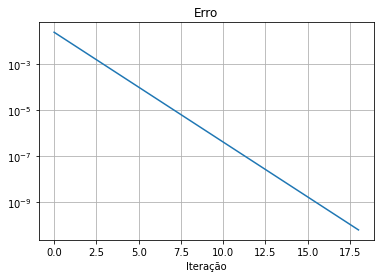

In [5]:
ax = None
vs, ls = itera(A, np.random.rand(2), tol=1e-10)

alvo = np.array([1,1])/np.sqrt(2)
erros = [ norm(v - alvo) for v in vs]

plt.semilogy(erros)
plt.title("Erro")
plt.xlabel("Iteração")
plt.grid()
ax = plt.gca()
plt.show()

In [6]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ys = ax.lines[0].get_ydata()

assert 1e-12 < min(ys) < 1e-10
assert np.all(ys[:-1] > ys[1:])

O que o último assert quer dizer?

Este assert foi utilizado para verificar se o gráfico é decresnte, ou seja, conforme aumentamos o número de iterações reduzimos o erro. Isso porque $ys[:-1]$ retorna todos os valores menos o último e $ys[1:]$ retorna todos os valores menos o primeiro. Assim, com esses arrays deslocados estaremos sempre comparando se um elemento é de fato menor que o seu anterior.

## Questão 3: Convergência comparada

Para cada um dos vetores `d1` e `d2` abaixo, considere a matriz $A = \operatorname{diag}(d_i)$ correspondente.

In [7]:
d1 = [1,10,20,30,31,32]
d2 = [1,10,20,29,30,32]

Qual é o autovetor com o maior autovalor para $A_1$ e $A_2$?

Sabemos que, em uma matriz diagonal, os elementos sãos os prórpios autovalores. Assim, o maior autovalor de $A_1$ é 32 asim como o maior autovalor de $A_2$. Logicamente, o autovetor associado a ambos os autovalores é $v = [0, 0, 0, 0, 0, 1]$. Considere, por exemplo, o sistema linear.

$$
A_1 v = \lambda v \\

$$

Como todas as coordenadas de v são 0 exceto a última esse sistema pode ser reduzido para:


$$
1 \cdot
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
32
\end{bmatrix} = 32 \begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0 \\
1
\end{bmatrix}

$$

Verificamos portanto a igualdade que classifica o v assima como autovetor associado a 32.


Agora, compare a velocidade de convergência do autovetor usando `itera` para cada uma destas matrizes,
fazendo o gráfico do erro entre os vetores gerados para $A_1$ e $A_2$ no mesmo eixo.

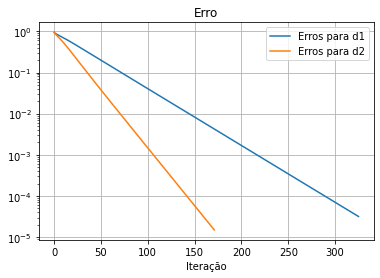

In [8]:
ax = None

vs_1, _ = itera(np.diag(d1), np.ones(6))
vs_2, _ = itera(np.diag(d2), np.ones(6))


alvo = np.array([0, 0, 0, 0, 0, 1])
erros_1 = [ norm(v - alvo) for v in vs_1]
erros_2 = [ norm(v - alvo) for v in vs_2]
plt.semilogy(erros_1, label="Erros para d1")
plt.semilogy(erros_2, label="Erros para d2")
plt.legend()
plt.title("Erro")
plt.xlabel("Iteração")
plt.grid()


ax = plt.gca()
plt.show()

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Para qual matriz há convergência mais rápida?  Como você explicaria isso?

A matriz $A_2$ converge mais rápido. 

O nosso método é baseado na seguinte equação.
$$

A^n x = \sum x_i v_i (\lambda_i)^n 
$$

A ideia é que com n tendendo a infinito, o item do somatório associado ao maior autovalor vai sobressair e com isso, se $v_1$ for o autovetor associado ao maior autovalor: 

$$
\frac{A^n x}{||A^n x ||} \rightarrow \frac{v_1}{||v_1||}
$$

A partir do somatório podemos perceber que: a convergência é mais rápida quando os outros autovalores estão distantes do maior autovalor. 

Os autovalores de $A_1$ e $A_2$ são $d_1$ e $d_2$. Como as coordenadas quatro e cinco do $d_2$ são menores que as coordenadas quatro e cinco do $d_1$ e, portanto, mais distantes de 32, $A_2$ converge mais rápido.

## Questão 4: Convergência?

Sejam $\theta \in [0,2\pi]$ e $\alpha \in \mathbb{R}$,
e considere a matriz 
$$A(\theta, \alpha) = \begin{bmatrix} 
\cos(\theta) & \sin(\theta) & 0\\
-\sin(\theta) &\cos(\theta) &  0\\
0 & 0 & \alpha\\
\end{bmatrix}.$$

Qual a interpretação geométrica dessa matriz?

Esta matriz é uma matriz de rotação que quando aplicada sobre um vetor modifica sua direção rotacionando-o em um ângulo $\theta$ em relação ao eixo z. Além disso, essa matriz multiplica a coordenada em z de um vetor por um valor $\alpha$.

Quais são os autovetores de $A$ (em função de $\theta$ e $\alpha$)?

Para encontrar os autovetores precisamos primeiro encontrar os autovalores. Isso pode ser feito calculando o polinômio característico P a partir da equação $det(A - \lambda I) = 0$.

$$
    P = (\lambda - \alpha) (1 - 2\lambda \cos{\theta} + \lambda^2)
$$

As raízes desse polinômio são $\lambda_1 = \alpha$, $\lambda_2 = \cos{\theta} - \sin{\theta}i$ e  $\lambda_3 = \cos{\theta} + \sin{\theta}i$. Os valores complexos apareceram pois o discriminante do fator quadrático do nosso polinômio é negativo. Assim, com os autovalores calculados, podemos formular os autovetores resolvendo o sistema linear $(A - \lambda_i I)v_i = 0$. 

No primeiro sistema, $(A - \lambda_1 I)v_1 = 0$, obtemos o autovetor $v_1 = \{0, 0, 1\}$. Isso faz sentido para esta matriz. Qualquer vetor que esteja no eixo $z$ não será rotacionado, terá apenas sua magnitude modificada pelo $\alpha$. 

O segundo sistema, $(A - \lambda_2 I)v_2 = 0$, possui infinitas soluções do tipo $v_2 = \{ix_2, x_2, 0\}$, em que $x_2$ pode assumir qualquer valor. Assim, podemos afirmar que $v_2 = {i, 1, 0}$ é o autovetor associado ao autovalor $\lambda_2$.

O terceiro sistema  $(A - \lambda_3 I)v_3 = 0$ também possui infinitas soluções que são do tipo  $v_3 = \{-ix_2, x_2, 0\}$, onde $x_2$ pode assumir qualquer valor. Então, podemos afirmar que $v_3 = \{-i, 1, 0\}$ é o autovetor associado ao autovalor $\lambda_3$.



Implemente a função abaixo que gera a matriz $A$:

In [10]:
def make_matrix(theta, alpha):

    return np.array([ [np.cos(theta), np.sin(theta), 0], [- np.sin(theta), np.cos(theta), 0],  [0, 0, alpha]  ])

In [11]:
assert np.allclose(make_matrix(0,1),np.eye(3))
assert np.allclose(make_matrix(np.pi,0.5),[[-1,0,0],[0,-1,0],[0,0,0.5]])

Fixando $\theta = \dfrac{\pi}{4}$,
faça um gráfico do número de iterações necessários para calcular o maior autovetor,
em função de $\alpha \in [0.5,1.5]$, com precisão `1e-12`.

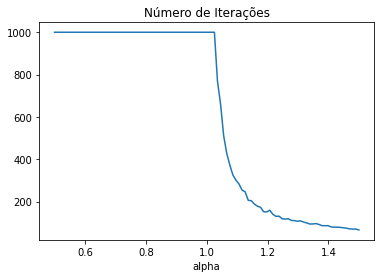

In [12]:
alphas = np.linspace(0.5,1.5,100)
ax = None
num_iter = []
for alpha in alphas:
    A = make_matrix(np.pi/4, alpha)
    xs, ls = itera(A, np.random.rand(3), tol=1e-12)
    num_iter.append(len(xs))

plt.plot(alphas, num_iter)
plt.title("Número de Iterações")
plt.xlabel("alpha")
ax = plt.gca()
plt.show()

In [13]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert 100 > ys.min() > 60
assert ys[55] < 600
assert ys[50] > 900

Agora, faça o gráfico com a estimativa do autovalor, novamente em função de $\alpha$.

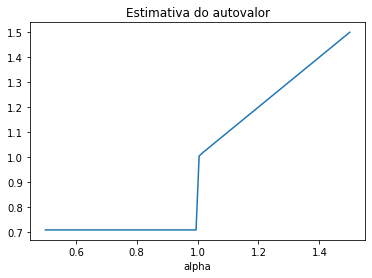

In [14]:
alphas = np.linspace(0.5,1.5,100)
ax = None
l = []
for alpha in alphas:
    A = make_matrix(np.pi/4, alpha)
    xs, ls = itera(A, np.random.rand(3), tol=1e-12)
    l.append(ls[-1])

plt.plot(alphas, l)
plt.title("Estimativa do autovalor")
plt.xlabel("alpha")
ax = plt.gca()
plt.show()

In [15]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""

ys = ax.lines[0].get_ydata()

assert np.all(0.7 <= ys) and np.all(ys <= 1.5)

Como explicar a variação no número de iterações? O que isso tem a ver com o autovalor retornado?

Para os parâmetros passados, os autovalores seriam $\lambda_1 = \alpha$,  $\lambda_2 = \frac{\sqrt(2)}{2} - \frac{\sqrt(2)}{2}i$ e $\lambda_3 = \frac{\sqrt(2)}{2} + \frac{\sqrt(2)}{2}i$. Observando o gráfico, podemos perceber que a partir de $\alpha = 1$ o autovalor $\lambda_1$ passa a ser o maior autovalor, fazendo nosso método convergir para $\alpha$. Esse corte acontece justamente no ponto 1.0, pois as operações com funções trigonométricas presentes nos outros autovaloress não permitem que eles cheguem a 1. Essa ideia é preservada mesmo com a incerteza do que acontece com as partes complexas. 

Quanto maior o  $\alpha$, mais distante este autovalor está dos outros e mais rápida é a convergência, o que explica a queda exponencial no número de iterações. 

Antes de $\alpha = 1$ os autovalores complexos estavam sobressaindo no nosso método, mas como estamos apenas trabalhando com operações de números reais o número de iterações chega no valor máximo, indicando que não há convergência. 

# Questão 5: Autovalores negativos

Em princípio, tudo deveria funcionar de forma muito similar para autovalores **negativos**.

Estude o caso $\alpha \in [-1.5, -0.5]$, fazendo os dois gráficos lado a lado.

Text(0.5, 0, 'alpha')

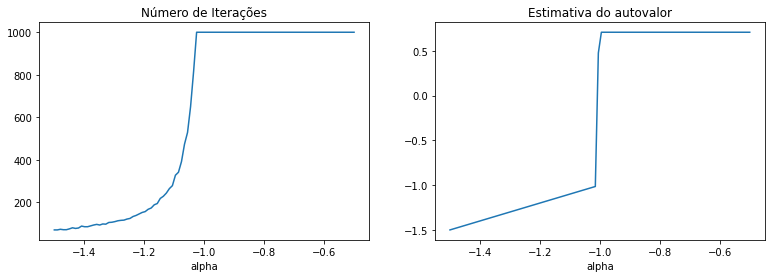

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))
negalphas = np.linspace(-1.5, -0.5, 100)
ax = None
alphas = np.linspace(-1.5,-0.5,100)

l = []
num_iter = []
for alpha in alphas:
    A = make_matrix(np.pi/4, alpha)
    xs, ls = itera(A, np.random.rand(3), tol=1e-12)
    num_iter.append(len(xs))
for alpha in alphas:
    A = make_matrix(np.pi/4, alpha)
    xs, ls = itera(A, np.random.rand(3), tol=1e-12)
    l.append(ls[-1])

ax1.plot(alphas, num_iter)
ax1.set_title("Número de Iterações")
ax2.plot(alphas, l)
ax2.set_title("Estimativa do autovalor")
ax2.set_xlabel("alpha")
ax1.set_xlabel("alpha")

In [20]:
assert ax1.title.get_text() != ""
assert len(ax1.lines) == 1
assert ax1.get_xlabel() != ""

ys1 = ax1.lines[0].get_ydata()

assert 100 > ys1.min() > 60
assert ys1[44] < 600
assert ys1[49] > 900


assert ax2.title.get_text() != ""
assert len(ax2.lines) == 1
assert ax2.get_xlabel() != ""

ys2 = ax2.lines[0].get_ydata()

assert np.all(0.71 >= ys2)
assert np.all(ys2 >= -1.5)

Para funcionar, o teste `ys1[i] < 600` teve seu índice foi trocado de `55` para `44`.
Explique esta mudança, tanto do ponto de vista matemático,
quanto da linguagem Python. 

Estamos utilizando 100 valores de $\alpha$. Antes os valores mais a direita de $\alpha$ apresentavam a convergência em menos iterações. Agora os valores mais a esquerda que tem essa propriedade. Assim, se anterioremente estávamos escolhendo um ponto um pouco mais a direita da metade do número de pontos, agora devemos escolher um ponto um pouco menor que essa metade, já que os gráficos são bem similares, sendo um praticamente o espelho do outro. 

Poderíamos pensar que o ponto 55 corresponde ao 45 quando espelhamos, mas não é verdade. Isso tem a ver com o fato de o número de pontos ser par. Imagine o seguinte array:

$$x = [1, 2, 3, 4, 5, 6]$$

Vamos invertê-lo:

$$y = [6, 5, 4, 3, 2, 1]$$

Repare que o elemento de valor 5 é obtido pelo índice 4 ($x[4] = 5$) para o vetor não invertido e é obtido pelo índice 1 para o vetor invertido $x[1]$. Assim antes o 5 estava duas casas da metade, mas com a inversão ele passa a estar apenas a uma casa de distância.



Explique, também, porque $0.71$ deve ser suficiente como cota superior. (Aqui, é "só" matemática, mas a matemática pode ser um pouco mais complexa)

Isso tem relação com nosso autovalores complexos para os parâmetros dados: $\lambda_2 = \frac{\sqrt(2)}{2} - \frac{\sqrt(2)}{2}i$ e $\lambda_3 = \frac{\sqrt(2)}{2} + \frac{\sqrt(2)}{2}i$. Sabemos que $\sqrt{2}/2 = 0.707$, assim estamos utilizando como cota superior um valor um pouco maior que o resultado do sen e do cos para um ângulo de 45°. O que faz sentido, se o computador não estiver conseguindo interpretar a parte imaginária dos autovalores, já que só trabalhamos com números reais, os autovalores que ele vai conseguir retorar são da parte real.

# Questão 6: Mudando $\theta$

A velocidade de convergência muda ao trocar $\theta$?
Teste outros valores, e refaça os gráficos, agora com várias curvas em cada eixo,
uma para cada um dos valores de $\theta$ que você estudou.

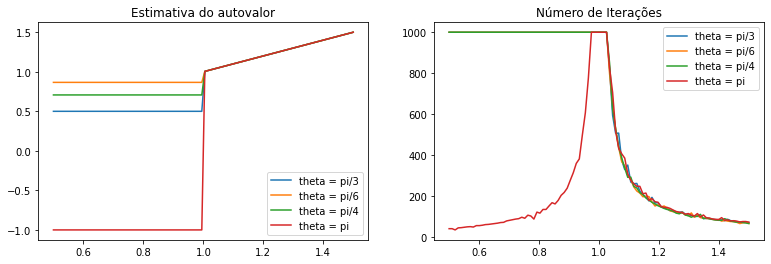

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))

thetas = [ np.pi/3, np.pi/6, np.pi/4, np.pi]
leg_theta = [ "pi/3", "pi/6", "pi/4", "pi"]
alphas = np.linspace(0.5,1.5,100)
for (theta, leg) in zip(thetas, leg_theta):
    num_iter = []
    l = []
    for alpha in alphas:
        A = make_matrix(theta, alpha)
        xs, ls = itera(A, np.random.rand(3), tol=1e-12)
        num_iter.append(len(xs))
        l.append(ls[-1])

    ax1.plot(alphas, l, label=f"theta = {leg}")
    ax2.plot(alphas, num_iter, label=f"theta = {leg}")

ax1.legend()
ax2.legend()

ax1.set_title("Estimativa do autovalor")
ax2.set_title("Número de Iterações")
ax = plt.gca()
plt.show()

O que você observa?  Isso faz sentido?

No primeiro gráfico, percebemos o mesmo padrão do gráfico de estimativa do autovalor anterior. Novamente a partir do 1, vamos convergir para o autovalor $\alpha$ e para um valor menor que 1, a convergência fica próxima da parte real dos autovalores $\lambda_2$ e $\lambda_3$. Essa convergência parece ocorrer com a mesma velocidade.


O segundo gráfico também pode ser explicado da mesma forma que o gráfico da questão anterior exceto pelo $\theta = \pi$. Isso porque os autovalores da matriz  $\lambda_2 = \cos{\theta} - \sin{\theta}i$ e $\lambda_3 = \cos{\theta} + \sin{\theta}i$, tem a função $sen(\theta)$ como parte imaginária. Assim, para todo valor de $\theta$ que anula o seno, teremos autovalores reais, permitindo a convergência.